In [9]:
import os
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

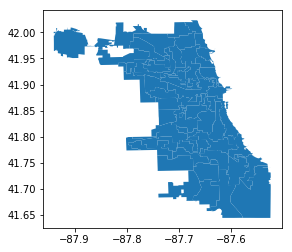

In [10]:
map_file = 'Boundaries_Wards_2015/chicago_wards.shp'

map_df = gpd.read_file(map_file)
map_df.head()

map_df.plot()

In [11]:
crime_df_cleaned = pd.read_csv('crimes-in-chicago/cleaned_data.csv')
crime_df_cleaned.drop(columns=['Unnamed: 0'], inplace=True)

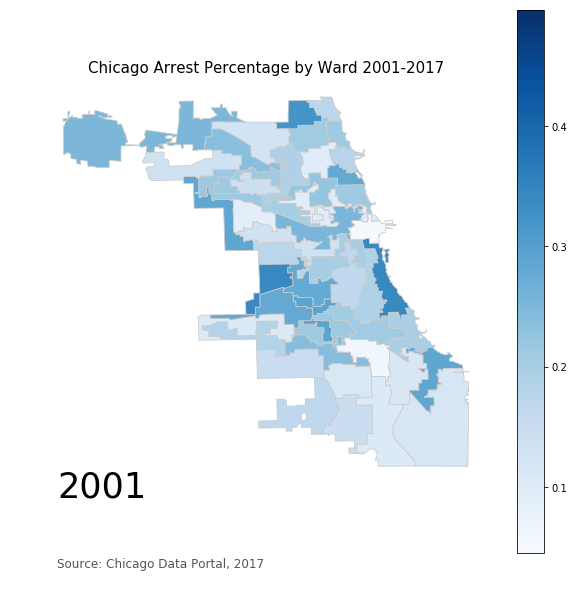

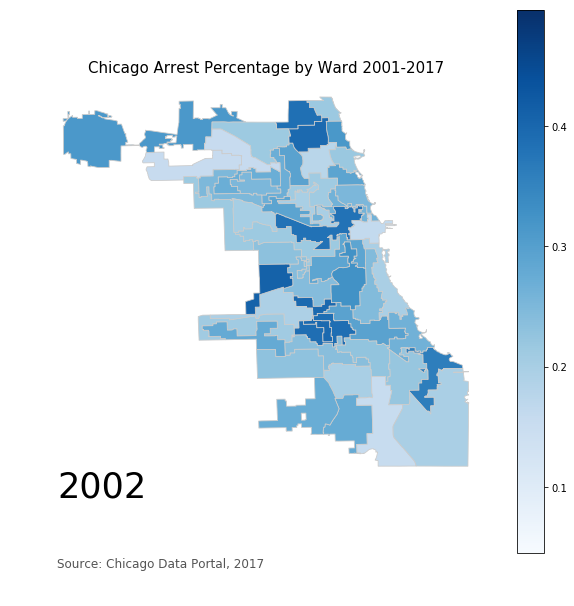

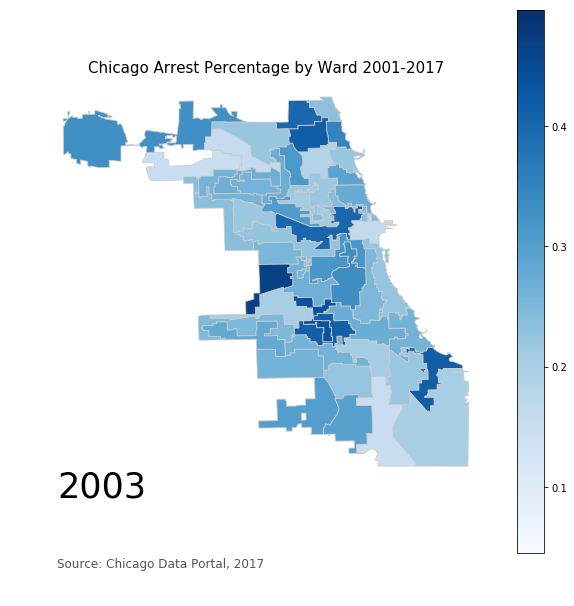

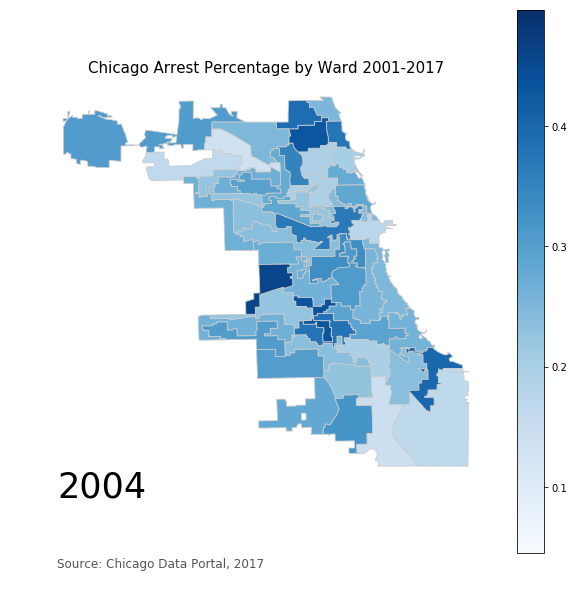

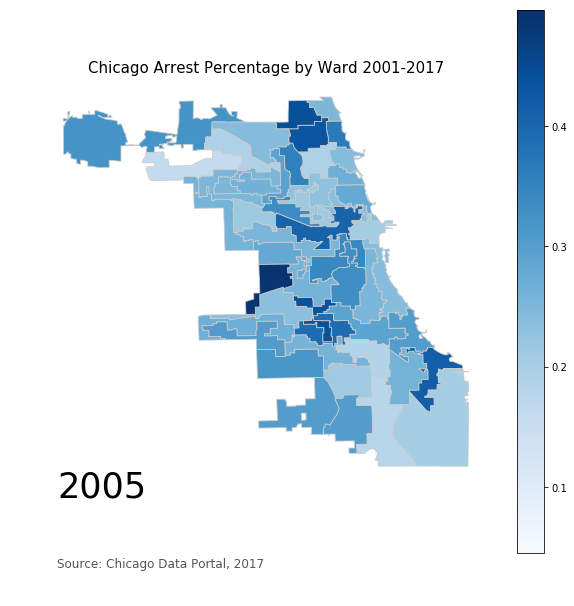

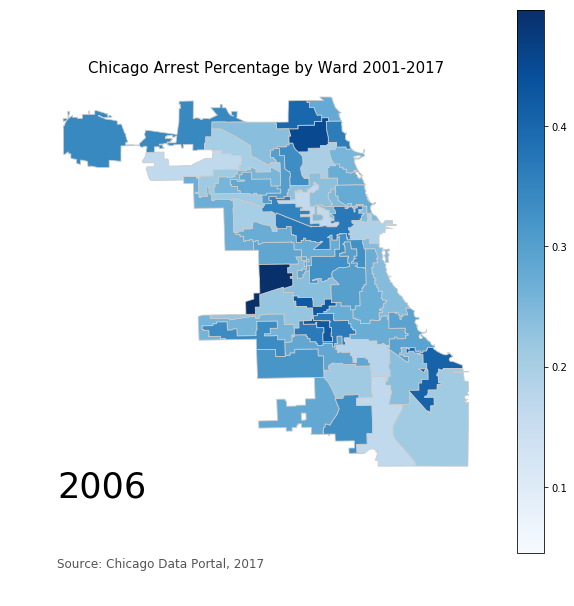

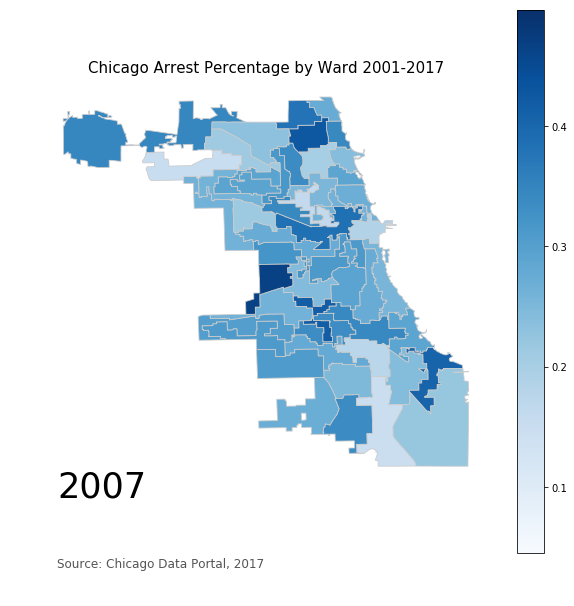

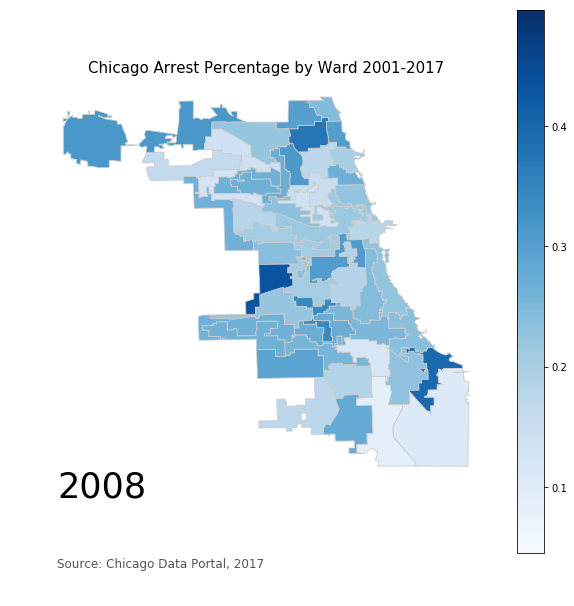

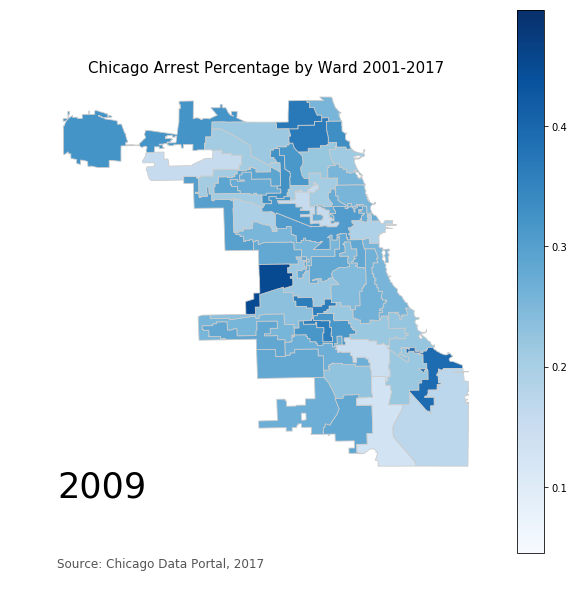

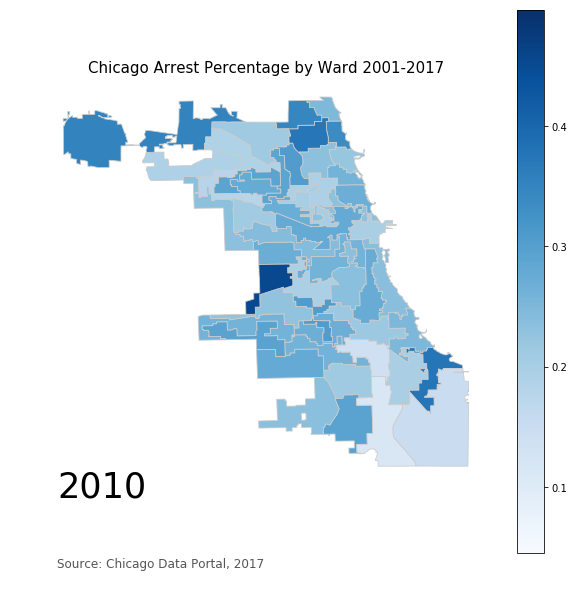

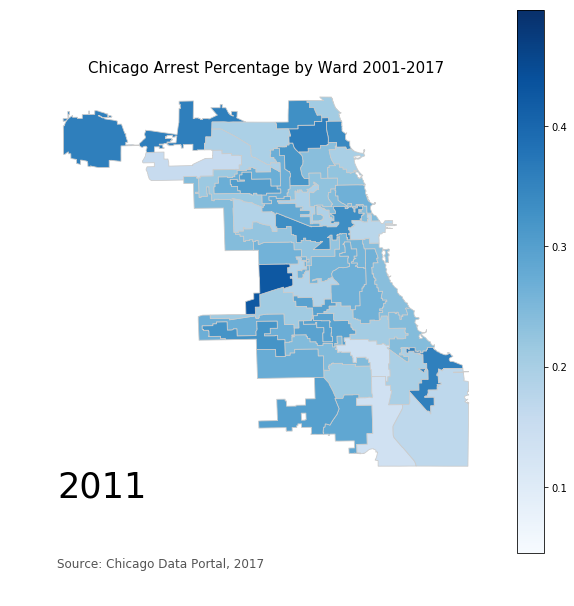

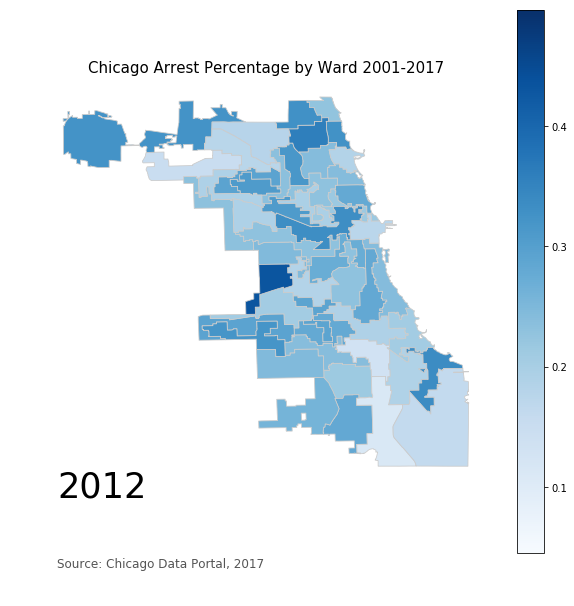

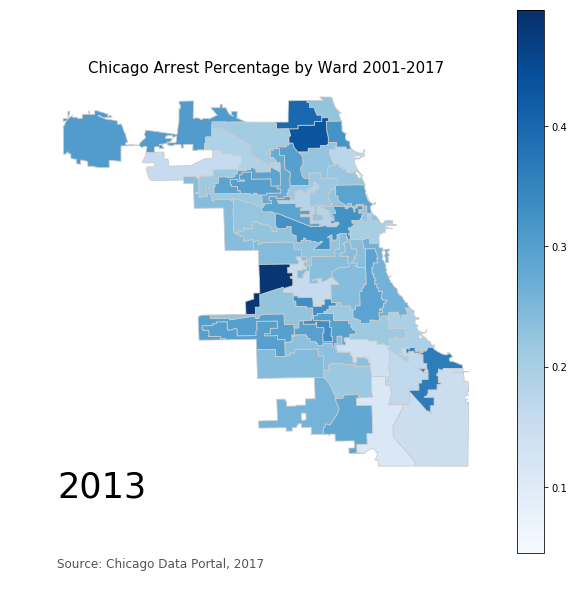

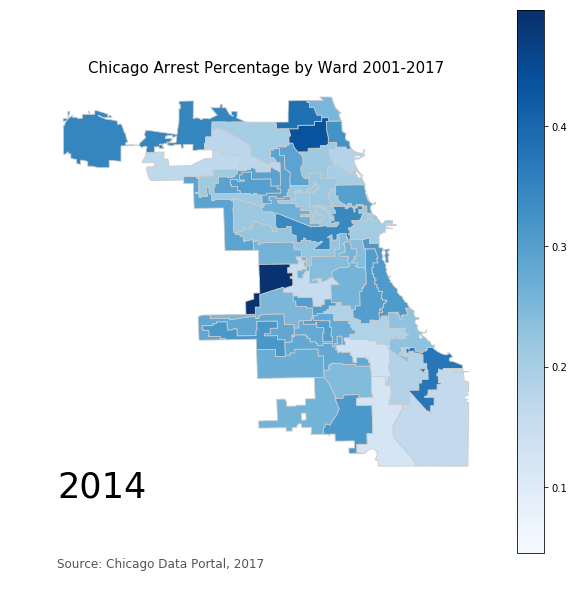

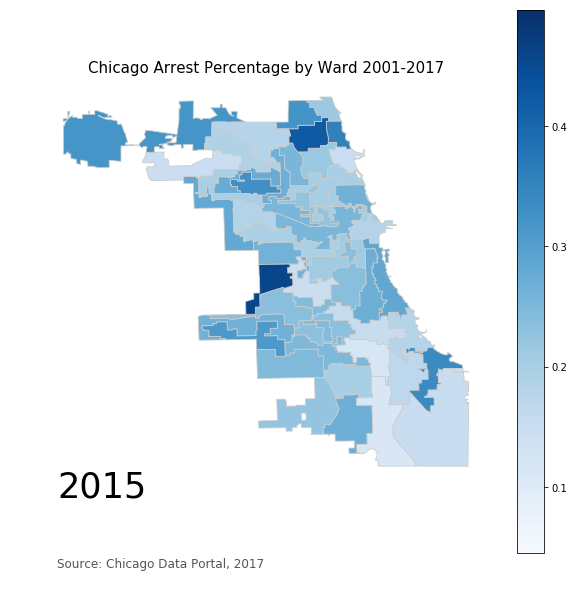

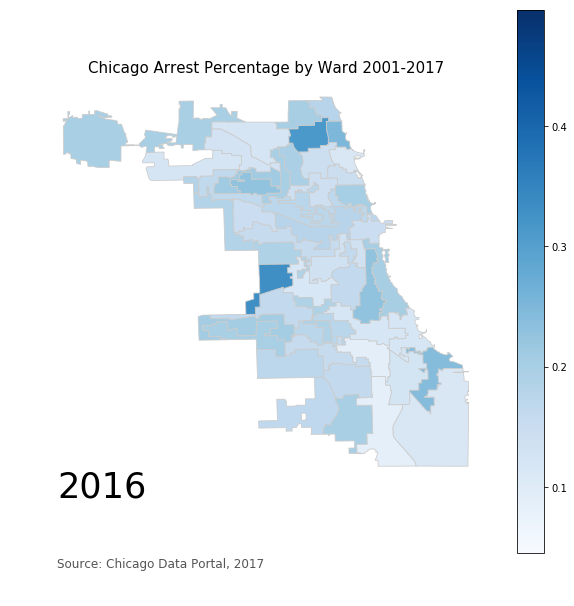

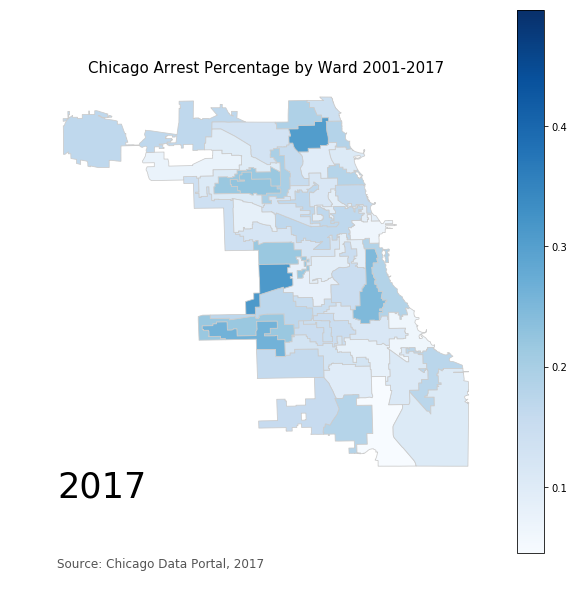

In [13]:
output_path = 'maps/arrest_percentage'
file_suffix = '_arrest_pct.jpg'

# Initialize map variables
map_var = 'Arrests Pct'
vmin = crime_df_cleaned['Arrests Pct'].min()
vmax = crime_df_cleaned['Arrests Pct'].max()

year_min = 2001
year_max = 2017
list_of_years = [*range(year_min, year_max + 1)]
for year in list_of_years:
    ward_map_data = crime_df_cleaned.loc[crime_df_cleaned.Year == year].reset_index()
    merged = map_df.join(ward_map_data)
    merged.head()
    
    # Create plot
    fig = merged.plot(column=map_var, cmap='Blues', figsize=(10,10), 
                      linewidth=0.8, edgecolor='0.8', vmin=vmin, vmax=vmax, 
                      legend=True, norm=plt.Normalize(vmin=vmin, vmax=vmax))
    
    # remove axis of chart
    fig.axis('off')

    # add a title
    fig.set_title('Chicago Arrest Percentage by Ward 2001-2017', \
              fontdict={'fontsize': '15',
                         'fontweight' : '3'})
    fig.annotate(str(year), xy=(0.1, .225), xycoords='figure fraction',
                 horizontalalignment='left', verticalalignment='top',
                 fontsize=35)
    fig.annotate('Source: Chicago Data Portal, 2017', xy=(0.1, 0.08),xycoords='figure fraction', 
                 horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')
    
    # Save map
    filepath = os.path.join(output_path, str(year)+file_suffix)
    chart = fig.get_figure()
    chart.savefig(filepath, dpi=300)